# Table of contents

1. [Exponential decay](#expdec)  
    1.1 [Exponential pdf](#exp)   
    
2. [The bent coin](#coin)     
    2.1 [Likelihood](#lik)    
    2.2 [Prior](#prior)  
    2.3 [Bayes](#bayes)  
    2.4 [Beta integral](#beta)    
    2.5 [Excercise 3.5](#3.5)   
  
    


<a id="expdec"> </a>
# Exponential decay

<a id="exp"> </a>
## Exponential pdf

$\lambda$ - the rate parameter  



\begin{equation} 
\begin{split}
P(x|\lambda) = \lambda e^{-x/\lambda} = \frac{1}{\lambda}e^{-x/\lambda}
\end{split}
\end{equation}





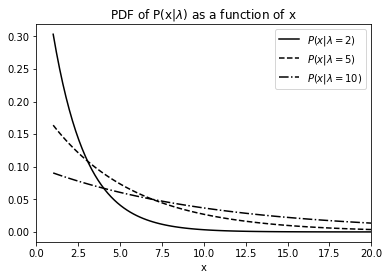

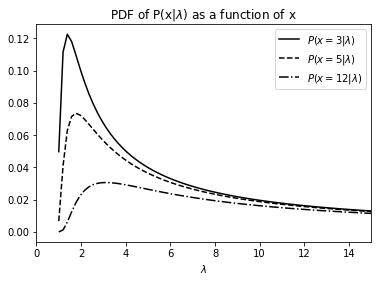

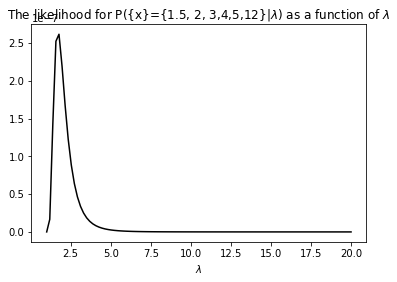

In [9]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = expon.stats(moments='mvsk')


x = np.linspace(1,20, 100)
l = np.linspace(1,100, 100)

# Plot
plt.plot(x, expon.pdf(x,scale=2), color='k',linestyle='-', label='$P(x|\lambda=2)$')
plt.plot(x, expon.pdf(x,scale=5), color='k',linestyle='--', label='$P(x|\lambda=5)$')
plt.plot(x, expon.pdf(x,scale=10), color='k',linestyle='-.', label='$P(x|\lambda=10)$')
plt.title("PDF of P(x|$\lambda$) as a function of x")
plt.xlabel('x')
plt.legend()
plt.xlim(0,20,1)
plt.show()

# Plot
plt.plot(x, expon.pdf(3,scale=l), color='k',linestyle='-', label='$P(x=3|\lambda)$')
plt.plot(x, expon.pdf(5,scale=l), color='k',linestyle='--', label='$P(x=5|\lambda)$')
plt.plot(x, expon.pdf(12,scale=l), color='k',linestyle='-.', label='$P(x=12|\lambda)$')
plt.title("PDF of P(x|$\lambda$) as a function of x")
plt.xlabel('$\lambda$')
plt.xlim(0,15,1)
plt.legend()
plt.show()


#x = np.array([1.5, 2, 3,4,5,12])
l = np.linspace(1,100, 100)
result = expon.pdf(1.5,scale=l)*expon.pdf(2,scale=l)*expon.pdf(3,scale=l)*expon.pdf(4,scale=l)*expon.pdf(5,scale=l)*expon.pdf(12,scale=l)

# Plot
plt.plot(x, result, color='k',linestyle='-')
plt.title("The likelihood for P({x}={1.5, 2, 3,4,5,12}|$\lambda$) as a function of $\lambda$")
plt.xlabel('$\lambda$')
plt.show()



<a id="beta"> </a>
# The bent coin

<a id="lik"> </a>
## Likelihood

### The binomial distribution

$f$ - the probability of heads

$r$ - the number of heads

$N$ - the number of tosses

\begin{equation} 
\begin{split}
P(r|f,N) = \binom{N}{r}f^r(1-f)^{N-r}
\end{split}
\end{equation}

The same as:

s - {${F_a,F_b}$}

\begin{equation} 
\begin{split}
P(s|F,\mathcal{H}_1) = p_a^{F_a}(1-p_a)^{F_{b}}
\end{split}
\end{equation}

<a id="prior"> </a>
## Prior

### Uniform

\begin{equation} 
\begin{split}
P(p_a|\mathcal{H}_1) = 1, p \in [0,1]
\end{split}
\end{equation}

<a id="bayes"> </a>
## Bayes


\begin{equation} 
\begin{split}
P(p_a|s,F,\mathcal{H}_1) = \frac {P(s|p_a,F,\mathcal{H}_1)P(p_a|\mathcal{H}_1)}{P(s|F,\mathcal{H}_1)}
\end{split}
\end{equation}

<a id="beta"> </a>
## Normalizing constant - the Beta integral


\begin{equation} 
\begin{split}
P(s|F,\mathcal{H}_1) = \int_{0}^{1} dp_a^{F_a}(1-p_a)^{F_b} = \frac{F_a!F_b!}{(F_a+F_b+1)}
\end{split}
\end{equation}

<a id="3.5"> </a>
## Excercise 3.5

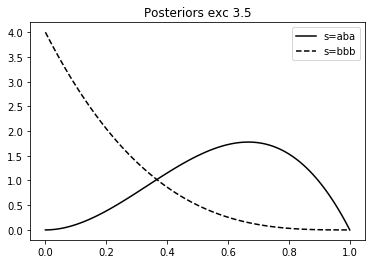

In [8]:
import scipy.special as sc

# Note that you need sc.beta(Fa+1, Fb+1)

# Calculate the posterior
def post(Fa,Fb,pa):
    Ps = sc.beta(Fa+1, Fb+1)
    lik = pa**Fa * (1-pa)**Fb
    post= lik/Ps
    return post

p = np.linspace(0,1, 100)

# Plot
plt.plot(p, post(2,1,p), color='k',linestyle='-',label='s=aba')
plt.plot(p, post(0,3,p), color='k',linestyle='--',label='s=bbb')
plt.title("Posteriors exc 3.5")
plt.legend()
plt.show()
